In [1]:
import numpy as np

In [2]:
def softmax_function(z):
    #e_z = np.exp(z - np.max(z))  
    e_z = np.exp(z)
    return e_z / e_z.sum(axis=1, keepdims=True)


In [3]:
from sklearn.datasets import make_classification
import pandas as pd

# defining the number of samples, features and classes
n_samples = 1000
n_features = 2
n_classes = 4

# sklearn to generate a classification dataset

#informative -> features that are useful for the classification
#redundant -> features that are not adding new information but are derived from the informative features
#repeated -> duplicating informative or redundant features

#informative + redundant + repeated -> samples

#clusters_per_class -> 1 cluster in the group ->all data points within each class come from the same distribution.

# class_sep -> increase this parameter to increase class separation
X, y = make_classification(n_samples=n_samples,
                           n_features=n_features,
                           n_informative=2,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=n_classes,
                           n_clusters_per_class=1,
                            class_sep=2, 
                           random_state=1)

# coverting it to a pandas df for better visualization and handling
df = pd.DataFrame(data=X, columns=['Feature1', 'Feature2'])
df['Target'] = y


print(df)


     Feature1  Feature2  Target
0    1.863411  0.087646       3
1   -1.530997  1.901182       2
2   -0.017224 -2.591112       0
3   -2.032039 -1.801162       0
4    4.620555  0.901124       3
..        ...       ...     ...
995  3.143260  3.223026       3
996  2.425043 -1.236500       1
997  2.330195  4.721810       3
998 -2.010841  1.426339       2
999 -2.008732  2.245402       2

[1000 rows x 3 columns]


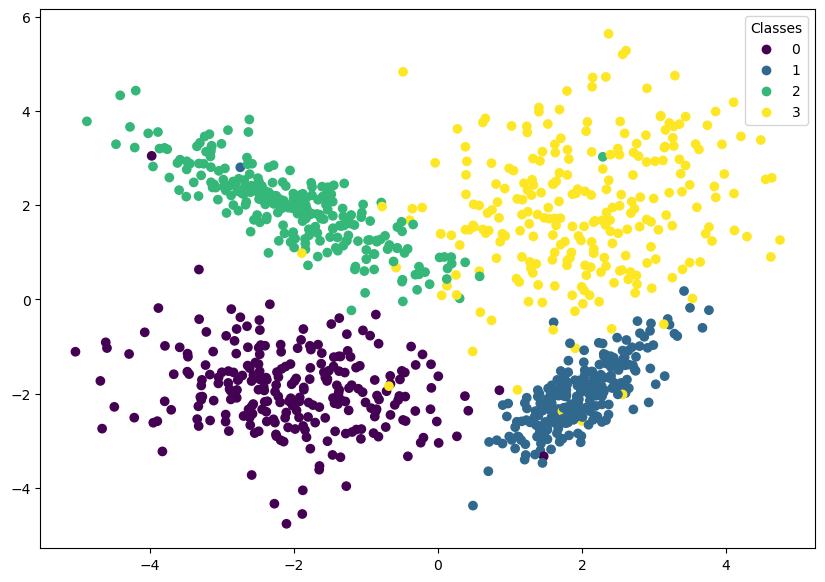

In [4]:
import matplotlib.pyplot as plt

# Separate features
feature1 = df['Feature1']
feature2 = df['Feature2']

# Create a scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(feature1, feature2, c=df['Target'], cmap='viridis')

# Create a legend
plt.legend(*scatter.legend_elements(), title='Classes')

# Show the plot
plt.show()


In [5]:
# exporting the DataFrame to a CSV file
df.to_csv('data/multi_class_generated.csv', index=False)


In [6]:
data = np.loadtxt("data/multi_class_generated.csv", delimiter=",", skiprows=1)
print(data.shape)

(1000, 3)


In [7]:
X_train = data[:,:2]
y_train = data[:,2]

print(f"Classes: {np.unique(y_train)}")

print(f"Shape of X_train: {X_train.shape}, Shape of y_train: {y_train.shape}")

Classes: [0. 1. 2. 3.]
Shape of X_train: (1000, 2), Shape of y_train: (1000,)


In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.activations import softmax, relu

#Apple Silicon: optimizers.legacy.Adam
#Base: optimizers.Adam
from tensorflow.keras.optimizers.legacy import Adam

In [9]:
# Set seed for reproducibility, ensuring "random" numbers are predictable
tf.random.set_seed(15)

model = Sequential(
    [ 
        # Input layer to specify expected shape of the input data, (2,) features in this case
        Input(shape=(2,)),
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax') 
    ]
)

model.summary()


model.compile(
    loss= SparseCategoricalCrossentropy(),
    optimizer= Adam(0.001),
)

model.fit(
    X_train,y_train,
    epochs=200
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                75        
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 4)                 64        
                                                                 
Total params: 529 (2.07 KB)
Trainable params: 529 (2.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
32/32 [==============================] - 0s 668us/step - loss: 1.1241
Epoch 2/200
32/32 [==============================] - 0s 567us/step - loss: 0.7348
Epoch 3/200
32/32 [==============================] - 0s 525us/step - loss: 0.5158
Epoch 4/200
32/32 [=========================

32/32 [==============================] - 0s 484us/step - loss: 0.1089
Epoch 90/200
32/32 [==============================] - 0s 460us/step - loss: 0.1090
Epoch 91/200
32/32 [==============================] - 0s 484us/step - loss: 0.1083
Epoch 92/200
32/32 [==============================] - 0s 462us/step - loss: 0.1077
Epoch 93/200
32/32 [==============================] - 0s 471us/step - loss: 0.1085
Epoch 94/200
32/32 [==============================] - 0s 464us/step - loss: 0.1077
Epoch 95/200
32/32 [==============================] - 0s 464us/step - loss: 0.1082
Epoch 96/200
32/32 [==============================] - 0s 463us/step - loss: 0.1072
Epoch 97/200
32/32 [==============================] - 0s 488us/step - loss: 0.1073
Epoch 98/200
32/32 [==============================] - 0s 468us/step - loss: 0.1069
Epoch 99/200
32/32 [==============================] - 0s 467us/step - loss: 0.1073
Epoch 100/200
32/32 [==============================] - 0s 452us/step - loss: 0.1076
Epoch 101/200
32

32/32 [==============================] - 0s 494us/step - loss: 0.0965
Epoch 187/200
32/32 [==============================] - 0s 484us/step - loss: 0.0971
Epoch 188/200
32/32 [==============================] - 0s 464us/step - loss: 0.0982
Epoch 189/200
32/32 [==============================] - 0s 457us/step - loss: 0.0958
Epoch 190/200
32/32 [==============================] - 0s 458us/step - loss: 0.0968
Epoch 191/200
32/32 [==============================] - 0s 465us/step - loss: 0.0953
Epoch 192/200
32/32 [==============================] - 0s 469us/step - loss: 0.0958
Epoch 193/200
32/32 [==============================] - 0s 478us/step - loss: 0.0958
Epoch 194/200
32/32 [==============================] - 0s 491us/step - loss: 0.0959
Epoch 195/200
32/32 [==============================] - 0s 479us/step - loss: 0.0965
Epoch 196/200
32/32 [==============================] - 0s 511us/step - loss: 0.0953
Epoch 197/200
32/32 [==============================] - 0s 631us/step - loss: 0.0952
Epoch 

In [10]:
probabilities = model.predict(X_train)
print(probabilities)
print("largest value", np.max(probabilities), "smallest value", np.min(probabilities))

32/32 [==============================] - 0s 368us/step
[[1.7336795e-04 1.3010220e-02 2.9404485e-03 9.8387593e-01]
 [1.6422175e-04 2.4235719e-03 9.9343228e-01 3.9799446e-03]
 [9.7233599e-01 1.3368906e-02 3.1639971e-05 1.4263532e-02]
 ...
 [9.3652121e-11 6.9011399e-08 4.0747924e-04 9.9959236e-01]
 [4.6442016e-03 2.9661737e-03 9.8658746e-01 5.8022384e-03]
 [2.9782695e-04 4.1128364e-03 9.9312156e-01 2.4676560e-03]]
largest value 1.0 smallest value 5.658764e-12


In [11]:
#preffered model to reduce numerical roundoff errors

model_2 = Sequential(
    [ 
        Input(shape=(2,)),
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear'), #since from_logits = True
    ]
)

model_2.summary()

model_2.compile(
    loss= SparseCategoricalCrossentropy(from_logits=True), 
    optimizer= Adam(0.001),
)

model_2.fit(
    X_train,y_train,
    epochs=200
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                75        
                                                                 
 dense_4 (Dense)             (None, 15)                390       
                                                                 
 dense_5 (Dense)             (None, 4)                 64        
                                                                 
Total params: 529 (2.07 KB)
Trainable params: 529 (2.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
32/32 [==============================] - 0s 591us/step - loss: 1.3164
Epoch 2/200
32/32 [==============================] - 0s 551us/step - loss: 0.8978
Epoch 3/200
32/32 [==============================] - 0s 557us/step - loss: 0.6224
Epoch 4/200
32/32 [=======================

32/32 [==============================] - 0s 502us/step - loss: 0.1097
Epoch 90/200
32/32 [==============================] - 0s 472us/step - loss: 0.1095
Epoch 91/200
32/32 [==============================] - 0s 492us/step - loss: 0.1089
Epoch 92/200
32/32 [==============================] - 0s 477us/step - loss: 0.1083
Epoch 93/200
32/32 [==============================] - 0s 478us/step - loss: 0.1093
Epoch 94/200
32/32 [==============================] - 0s 449us/step - loss: 0.1083
Epoch 95/200
32/32 [==============================] - 0s 494us/step - loss: 0.1085
Epoch 96/200
32/32 [==============================] - 0s 584us/step - loss: 0.1082
Epoch 97/200
32/32 [==============================] - 0s 513us/step - loss: 0.1082
Epoch 98/200
32/32 [==============================] - 0s 520us/step - loss: 0.1077
Epoch 99/200
32/32 [==============================] - 0s 489us/step - loss: 0.1079
Epoch 100/200
32/32 [==============================] - 0s 484us/step - loss: 0.1085
Epoch 101/200
32

32/32 [==============================] - 0s 470us/step - loss: 0.1016
Epoch 187/200
32/32 [==============================] - 0s 484us/step - loss: 0.1016
Epoch 188/200
32/32 [==============================] - 0s 482us/step - loss: 0.1035
Epoch 189/200
32/32 [==============================] - 0s 469us/step - loss: 0.1008
Epoch 190/200
32/32 [==============================] - 0s 463us/step - loss: 0.1023
Epoch 191/200
32/32 [==============================] - 0s 483us/step - loss: 0.1008
Epoch 192/200
32/32 [==============================] - 0s 476us/step - loss: 0.1011
Epoch 193/200
32/32 [==============================] - 0s 477us/step - loss: 0.1010
Epoch 194/200
32/32 [==============================] - 0s 461us/step - loss: 0.1010
Epoch 195/200
32/32 [==============================] - 0s 464us/step - loss: 0.1013
Epoch 196/200
32/32 [==============================] - 0s 470us/step - loss: 0.1010
Epoch 197/200
32/32 [==============================] - 0s 464us/step - loss: 0.1008
Epoch 

In [12]:
logits_model2 = model_2.predict(X_train)
print(logits_model2)
print("largest value", np.max(logits_model2), "smallest value", np.min(logits_model2))

32/32 [==============================] - 0s 422us/step
[[ -7.455251    -1.8127517   -5.107468     2.381186  ]
 [ -5.5364194   -3.411397     2.3018541   -2.1958797 ]
 [  1.561463    -4.0983315   -6.753439    -2.4500587 ]
 ...
 [-18.139578    -6.100099    -0.37318516   8.534143  ]
 [ -3.8245597   -3.898913     1.7912393   -3.9613693 ]
 [ -5.4802055   -3.632871     1.8716681   -3.1680198 ]]
largest value 9.346532 smallest value -20.501888


In [13]:
model2_probabilities = tf.nn.softmax(logits_model2).numpy()
model2_softmax_custom = softmax_function(logits_model2)


print("Unrecommended:\n",probabilities)
print("model2_probabilities:\n",model2_probabilities)
print("model2_softmax_custom:\n",model2_softmax_custom)

Unrecommended:
 [[1.7336795e-04 1.3010220e-02 2.9404485e-03 9.8387593e-01]
 [1.6422175e-04 2.4235719e-03 9.9343228e-01 3.9799446e-03]
 [9.7233599e-01 1.3368906e-02 3.1639971e-05 1.4263532e-02]
 ...
 [9.3652121e-11 6.9011399e-08 4.0747924e-04 9.9959236e-01]
 [4.6442016e-03 2.9661737e-03 9.8658746e-01 5.8022384e-03]
 [2.9782695e-04 4.1128364e-03 9.9312156e-01 2.4676560e-03]]
model2_probabilities:
 [[5.2641019e-05 1.4853564e-02 5.5074878e-04 9.8454303e-01]
 [3.8858640e-04 3.2536667e-03 9.8538625e-01 1.0971485e-02]
 [9.7863263e-01 3.4088057e-03 2.3960920e-04 1.7718947e-02]
 ...
 [2.6043000e-12 4.4093034e-07 1.3537465e-04 9.9986410e-01]
 [3.6031718e-03 3.3449819e-03 9.8990941e-01 3.1424577e-03]
 [6.3429488e-04 4.0232618e-03 9.8893833e-01 6.4041354e-03]]
model2_softmax_custom:
 [[5.2641019e-05 1.4853565e-02 5.5074878e-04 9.8454303e-01]
 [3.8858640e-04 3.2536669e-03 9.8538625e-01 1.0971488e-02]
 [9.7863269e-01 3.4088052e-03 2.3960932e-04 1.7718950e-02]
 ...
 [2.6043000e-12 4.4093059e-07 1.353

In [14]:
#predicting categories for first 5 rows #SOFT-max not required
print("Original:")
print(y_train[:5])

print("\nUnrecommended:")
for i in range(5):
    print( f"{probabilities[i]}, class: {np.argmax(probabilities[i])}")
print("\nmodel2_logits:")
for i in range(5):
    print( f"{logits_model2[i]}, class: {np.argmax(logits_model2[i])}")
print("\nmodel2_probabilities:")
for i in range(5):
    print( f"{model2_probabilities[i]}, class: {np.argmax(model2_probabilities[i])}")
print("\nmodel2_softmax_custom:")
for i in range(5):
    print( f"{model2_softmax_custom[i]}, class: {np.argmax(model2_softmax_custom[i])}")

Original:
[3. 2. 0. 0. 3.]

Unrecommended:
[1.7336795e-04 1.3010220e-02 2.9404485e-03 9.8387593e-01], class: 3
[1.6422175e-04 2.4235719e-03 9.9343228e-01 3.9799446e-03], class: 2
[9.7233599e-01 1.3368906e-02 3.1639971e-05 1.4263532e-02], class: 0
[9.9986660e-01 1.3095853e-06 9.5958476e-06 1.2252186e-04], class: 0
[1.94161984e-07 5.12781963e-02 1.39774575e-05 9.48707581e-01], class: 3

model2_logits:
[-7.455251  -1.8127517 -5.107468   2.381186 ], class: 3
[-5.5364194 -3.411397   2.3018541 -2.1958797], class: 2
[ 1.561463  -4.0983315 -6.753439  -2.4500587], class: 0
[ 3.7171798 -6.812049  -6.8236995 -4.374713 ], class: 0
[-14.90088    -0.7160373 -14.378709    2.3395324], class: 3

model2_probabilities:
[5.2641019e-05 1.4853564e-02 5.5074878e-04 9.8454303e-01], class: 3
[3.8858640e-04 3.2536667e-03 9.8538625e-01 1.0971485e-02], class: 2
[9.7863263e-01 3.4088057e-03 2.3960920e-04 1.7718947e-02], class: 0
[9.9964094e-01 2.6733655e-05 2.6423988e-05 3.0590029e-04], class: 0
[3.1088366e-08 4.4

In [15]:
def plot_decision_boundary(X, model,title):
    # Create a grid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Use the model to predict the class for each point
    Z = model.predict(grid_points)
    Z = np.argmax(Z, axis=1)  # get the class with highest probability
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y_train, cmap=plt.cm.Spectral)
    plt.title(title)
    plt.show()


11432/11432 [==============================] - 3s 258us/step


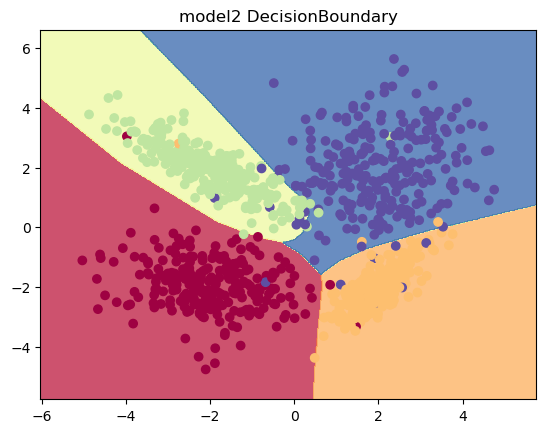

11432/11432 [==============================] - 3s 260us/step


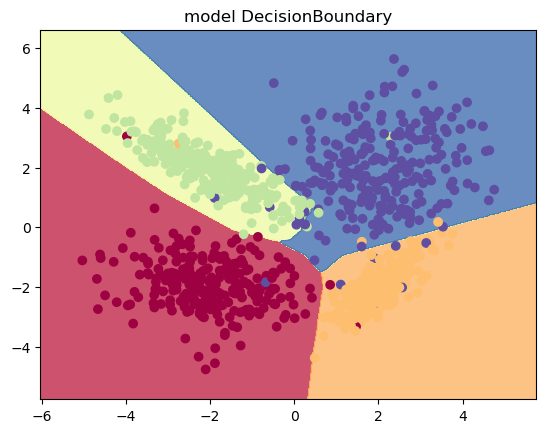

In [16]:
#plotting decision boundary for model and model_2
plot_decision_boundary(X_train, model_2,"model2 DecisionBoundary")
plot_decision_boundary(X_train, model, "model DecisionBoundary")

In [17]:
#model with less neurons

#preffered model to reduce numerical roundoff errors

model_3 = Sequential(
    [ 
        Input(shape=(2,)),
        Dense(2, activation = 'relu',name='L1'),
        Dense(4, activation = 'linear',name='L2'), #since from_logits = True
    ]
)

model_3.summary()

model_3.compile(
    loss= SparseCategoricalCrossentropy(from_logits=True), 
    optimizer= Adam(0.001),
)

model_3.fit(
    X_train,y_train,
    epochs=100
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 2)                 6         
                                                                 
 L2 (Dense)                  (None, 4)                 12        
                                                                 
Total params: 18 (72.00 Byte)
Trainable params: 18 (72.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 0s 497us/step - loss: 1.4307
Epoch 2/100
32/32 [==============================] - 0s 477us/step - loss: 1.3841
Epoch 3/100
32/32 [==============================] - 0s 486us/step - loss: 1.3430
Epoch 4/100
32/32 [==============================] - 0s 432us/step - loss: 1.3056
Epoch 5/100
32/32 [==============================] - 0s 449us/step - loss: 1.2700
Epoch 

32/32 [==============================] - 0s 443us/step - loss: 0.2048
Epoch 92/100
32/32 [==============================] - 0s 413us/step - loss: 0.2040
Epoch 93/100
32/32 [==============================] - 0s 415us/step - loss: 0.2035
Epoch 94/100
32/32 [==============================] - 0s 406us/step - loss: 0.2020
Epoch 95/100
32/32 [==============================] - 0s 433us/step - loss: 0.2012
Epoch 96/100
32/32 [==============================] - 0s 414us/step - loss: 0.2002
Epoch 97/100
32/32 [==============================] - 0s 423us/step - loss: 0.1994
Epoch 98/100
32/32 [==============================] - 0s 406us/step - loss: 0.1985
Epoch 99/100
32/32 [==============================] - 0s 412us/step - loss: 0.1978
Epoch 100/100
32/32 [==============================] - 0s 400us/step - loss: 0.1971


11432/11432 [==============================] - 3s 255us/step


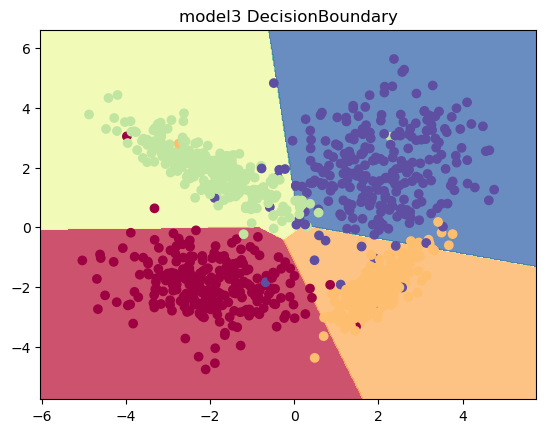

In [18]:
#plotting decision boundary for model_3
plot_decision_boundary(X_train, model_3,"model3 DecisionBoundary")